## Estadística Aplicada

Nombre: Barbara Govea Serna

Matrícula: 1902869

Grupo: 042

Fecha: 17-Oct-2023

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12


In [13]:
igae_deses=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

IGAE (PIB MENSUAL) Desestacionalizado 
- ARIMA: Serie no tiene componente estacional 
- SARIMA: Serie con componente estacional

In [14]:
igae_deses.head()

,meses,IGAE_DESES
0,1993/01,56.282290
1,1993/02,57.708594
2,1993/03,57.825254
3,1993/04,57.179522
4,1993/05,57.895451


### 1. Formato fecha
### 2. Fecha sea el index
### 3. Asignar una frecuencia 

In [15]:
# REQUISITO 1
igae_deses['meses']=pd.to_datetime(igae_deses['meses'],format='%Y/%m')
igae_deses.head(1)

,meses,IGAE_DESES
0,1993-01-01,56.28229


In [16]:
# REQUISITO 2
igae_deses=igae_deses.set_index('meses') # SOLO SE CORRE UNA VEZ 
igae_deses.head()

,IGAE_DESES
meses,
1993-01-01,56.282290
1993-02-01,57.708594
1993-03-01,57.825254
1993-04-01,57.179522
1993-05-01,57.895451


In [17]:
# REQUISITO 3
igae_deses=igae_deses.asfreq('MS')

In [18]:
igae_deses.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='meses', length=367, freq='MS')

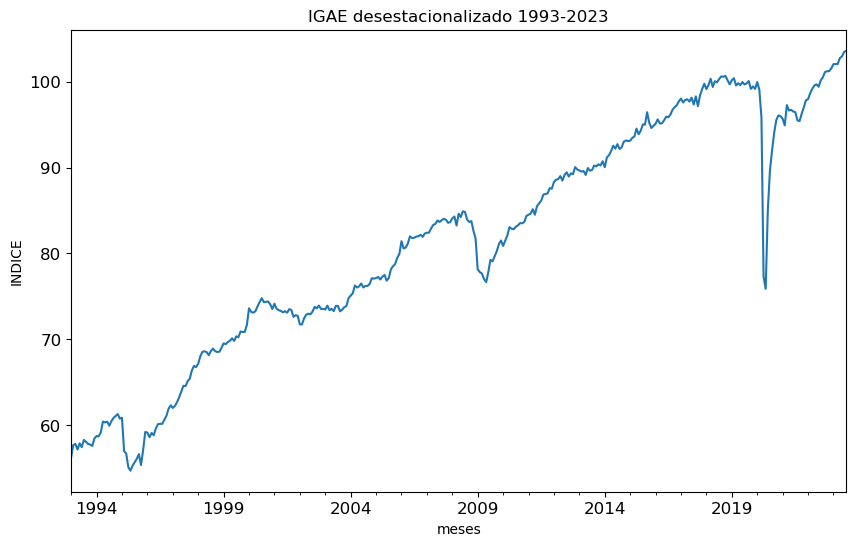

In [19]:
# Grafic de la serie
igae_deses['IGAE_DESES'].plot()
plt.title('IGAE desestacionalizado 1993-2023')
plt.ylabel('INDICE');

IGAE se comporta como una caminata aleatoria con deriva, sospechamos que es un proceso NO ESTACIONARIO.

# PRUEBA DE DICKEY FULLER AUMENTADA

### $H0:$ Serie no estacionaria 
### $H1:$ Serie estacionaria

## Si $p value < alpha$ RECHAZAMOS $H0$, La serie es estacionaria

In [20]:
prueba_DFA=adfuller(igae_deses['IGAE_DESES'])
pvalue=prueba_DFA[1]
pvalue.round(2)

0.74

Como el $pvalue > alpha$, no rechazamos $H0$

### El IGAE es una serie no estacionaria

## Para volverla estacionaria, necesitamos calcular las primeras diferencias del IGAE

## $$ \Delta_t = Y_t - Y_(t-1) $$

In [21]:
# Primeras diferencias del IGAE
igae_deses['igae_diff'] = igae_deses['IGAE_DESES'].diff()
igae_deses

,IGAE_DESES,igae_diff
meses,,
1993-01-01,56.282290,NaN
1993-02-01,57.708594,1.426305
1993-03-01,57.825254,0.116660
1993-04-01,57.179522,-0.645732
1993-05-01,57.895451,0.715929
...,...,...
2023-03-01,102.032776,-0.011138
2023-04-01,102.735045,0.702268
2023-05-01,102.924688,0.189644


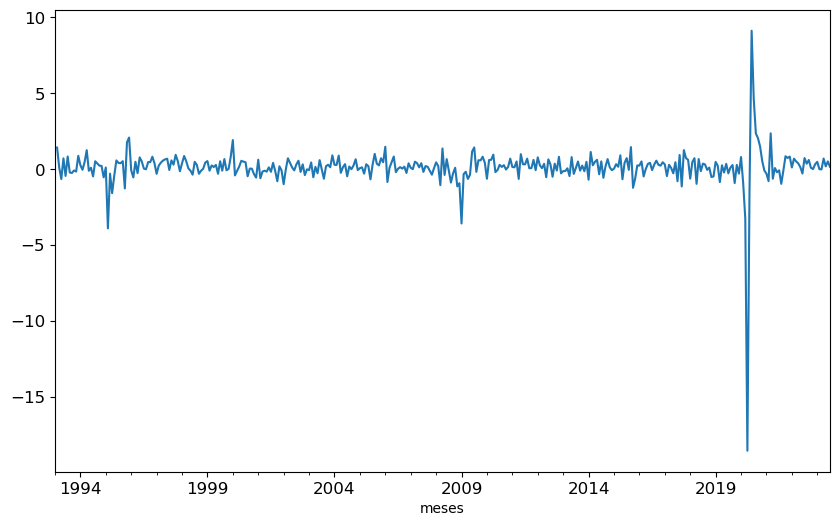

In [22]:
igae_deses['igae_diff'].plot();

In [23]:
## PRUEBA DE DICKER FULLER AUMENTADA para las primeras diferencias del IGAE
prueba_DFA1 = adfuller(igae_deses['igae_diff'].dropna())
pvalue=prueba_DFA1[1]
pvalue.round(2)

0.0

Como el $pvalue < alpha$, rechazamos $H0$

### Las primera diferencias del IGAE son una serie estacionaria

- IGAE = integrado I(1)
- 1eras IGAE = integrado I(0)

Ya sabemos que las primeras diferencias son un proceso estacionario, pero no sabemos que tipo de proceso estacionario es 

# Graficas de autocorrelación

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


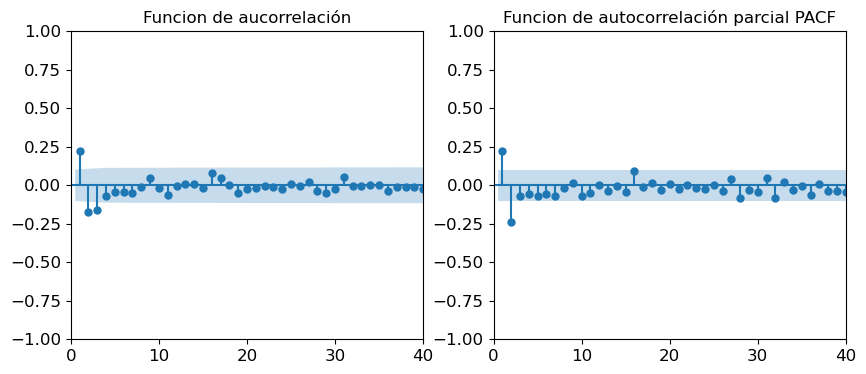

In [24]:
ig, ax = plt.subplots(1,2,figsize=(10,4))
# Primer subgrafica
plot_acf(igae_deses['igae_diff'].dropna(),zero=False,lags=40,ax=ax[0],title='Funcion de aucorrelación')
ax[0].set_ylim(-1,1)
ax[0].set_xlim(0,40)
# Segunda subgrafica
plot_pacf(igae_deses['igae_diff'].dropna(),zero=False,lags=40,ax=ax[1],title='Funcion de autocorrelación parcial PACF')
ax[1].set_ylim(-1,1)
ax[1].set_xlim(0,40);

## Suponer igae_diff es una AR(1) = ARMA(1,0) = ARIMA (1,0,0)

# Estimaremos ARIMA (MCO)

In [25]:
modelo_prueba=ARIMA(igae_deses['igae_diff'],order=(1,0,0))
resultadop=modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  367
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -602.265
Date:                Tue, 17 Oct 2023   AIC                           1210.530
Time:                        16:34:58   BIC                           1222.246
Sample:                    01-01-1993   HQIC                          1215.185
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1303      0.118      1.100      0.271      -0.102       0.363
ar.L1          0.2219      0.027      8.070      0.000       0.168       0.276
sigma2         1.5731      0.021     74.742      0.0

## El modelo estimado por MCO es: 

## $$ Y_t = .22 Y_{t-1} + \varepsilon_t $$

## Suponer igae_diff es una AR(2) = ARMA(2,0) = ARIMA (2,0,0)

# Estimaremos ARIMA (MCO)

In [26]:
modelo_prueba=ARIMA(igae_deses['igae_diff'],order=(2,0,0))
resultadop=modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  367
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -591.689
Date:                Tue, 17 Oct 2023   AIC                           1191.379
Time:                        16:34:58   BIC                           1207.000
Sample:                    01-01-1993   HQIC                          1197.585
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.110      1.179      0.238      -0.085       0.344
ar.L1          0.2747      0.027     10.270      0.000       0.222       0.327
ar.L2         -0.2367      0.017    -14.275      0.0

### Debemos elegir el menor AIC 

In [27]:
ic={}
for ar in range(7):
    for ma in range(7):
        print(f"AR:{ar}, MA={ma}")
        modelo = ARIMA(igae_deses['igae_diff'].dropna(),order=[ar,0 ,ma])
        resultado = modelo.fit()
        ic[(ar,ma)] = [resultado.aic,resultado.bic] 
ic = pd.DataFrame(ic,index=['AIC','BIC']).T
ic.index = ic.index.set_names(['AR','MA'])       

AR:0, MA=0
AR:0, MA=1
AR:0, MA=2
AR:0, MA=3
AR:0, MA=4
AR:0, MA=5
AR:0, MA=6
AR:1, MA=0
AR:1, MA=1
AR:1, MA=2
AR:1, MA=3
AR:1, MA=4


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:1, MA=5


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:1, MA=6


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:2, MA=0
AR:2, MA=1
AR:2, MA=2
AR:2, MA=3
AR:2, MA=4


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:2, MA=5


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:2, MA=6


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA=0
AR:3, MA=1


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA=2


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA=3


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA=4


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA=5


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3, MA=6


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4, MA=0
AR:4, MA=1


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:4, MA=2


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4, MA=3


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4, MA=4
AR:4, MA=5


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4, MA=6


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:5, MA=0
AR:5, MA=1


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:5, MA=2
AR:5, MA=3


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:5, MA=4


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:5, MA=5


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:5, MA=6


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6, MA=0
AR:6, MA=1


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6, MA=2


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:6, MA=3


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:6, MA=4


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6, MA=5


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6, MA=6


c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
ic.sort_values('AIC').head(1)

,,AIC,BIC
AR,MA,,
3,1,1183.372556,1206.788356


### Las primeras diferencias del IGAE son un ARMA(3,1)
* Primeras diferencias ARIMA (3,0,1)
* IGAE ARIMA (3,1,1)

In [29]:
# MODELO ARIMA PARA EL IGAE
arima_model = ARIMA(igae_deses['IGAE_DESES'],order=(3,1,1))
results=arima_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             IGAE_DESES   No. Observations:                  367
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -591.604
Date:                Tue, 17 Oct 2023   AIC                           1193.208
Time:                        16:35:24   BIC                           1212.721
Sample:                    01-01-1993   HQIC                          1200.962
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0175      0.232      4.384      0.000       0.563       1.472
ar.L2         -0.4222      0.072     -5.876      0.000      -0.563      -0.281
ar.L3          0.1048      0.089      1.176      0.2

In [30]:
# Pronosticar la serie original
igae_deses['Modelo_ARIMA']=results.predict()
igae_deses.head()


,IGAE_DESES,igae_diff,Modelo_ARIMA
meses,,,
1993-01-01,56.282290,NaN,0.000000
1993-02-01,57.708594,1.426305,56.282311
1993-03-01,57.825254,0.116660,58.035802
1993-04-01,57.179522,-0.645732,57.530971
1993-05-01,57.895451,0.715929,56.886611


In [31]:
igae_deses['Modelo_ARIMA'][0] = igae_deses['IGAE_DESES'][0]
igae_deses.head()

,IGAE_DESES,igae_diff,Modelo_ARIMA
meses,,,
1993-01-01,56.282290,NaN,56.282290
1993-02-01,57.708594,1.426305,56.282311
1993-03-01,57.825254,0.116660,58.035802
1993-04-01,57.179522,-0.645732,57.530971
1993-05-01,57.895451,0.715929,56.886611


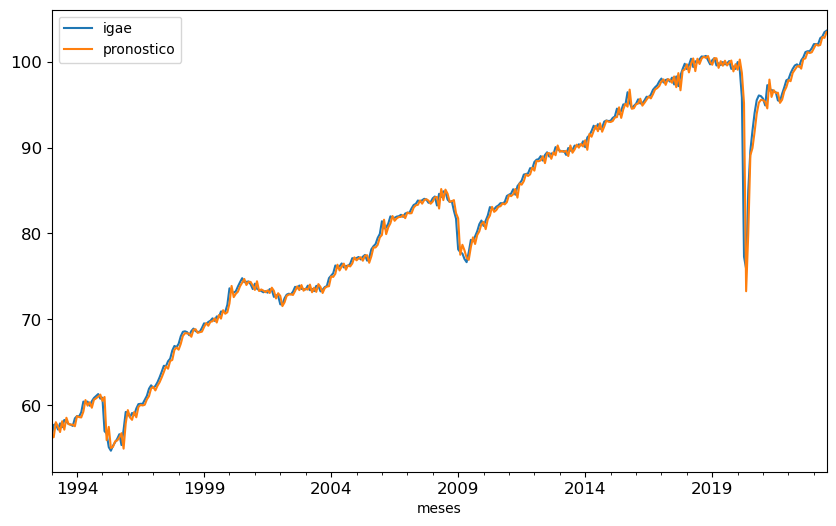

In [32]:
igae_deses['IGAE_DESES'].plot(label='igae')
igae_deses['Modelo_ARIMA'].plot(label='pronostico')
plt.legend();

<Axes: xlabel='meses'>

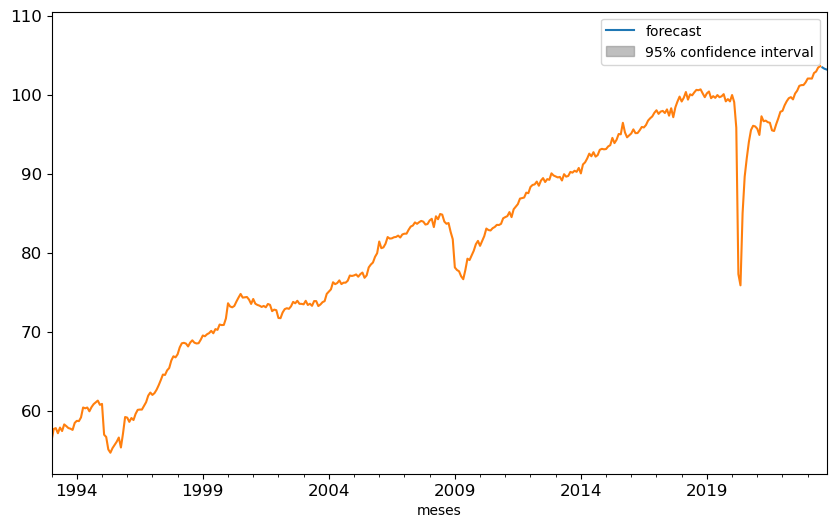

In [33]:
# Grafica del pronostico
plot_predict(results,start="2023-08-01",end="2023-10-01")
igae_deses['IGAE_DESES'].plot()

falta lo de plt.xlim ARRRIBAAAAAAAAAAA NO SE ´XQ NO EM AGARRA

In [34]:
results.predict(start='2023-08-01',end='2023-10-01')

2023-08-01    103.443848
2023-09-01    103.275282
2023-10-01    103.184865
Freq: MS, Name: predicted_mean, dtype: float64